In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

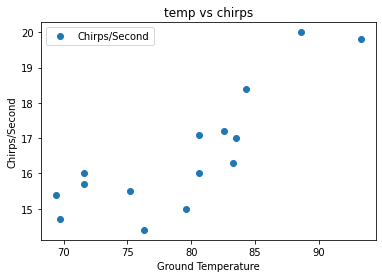

In [ ]:
# EDA

df.plot(x='Ground Temperature', y='Chirps/Second', style='o')

plt.title('temp vs chirps')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')

plt.show()

In [ ]:
# checking the correlation
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


Interpretation:
* there is high corelation between them
* hence, we can use Linear regression model

In [ ]:
# converting into numpy array

X = df.iloc[:, :-1].values # features 
y = df.iloc[:, -1].values # target

In [ ]:
# splitting the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 77)

In [ ]:
X_train.shape, X_test.shape

((12, 1), (3, 1))

In [ ]:
# scaling the data

# from sklearn.preprocessing import StandardScaler      
# scaler = StandardScaler()     # initialising

# scaler.fit(X_train)        # FIT : will find the values of mu and sigma only from TRAIN data
# X_train = scaler.transform(X_train)       # convert X_train data into "X_train-(normalised)"  
# X_test = scaler.transform(X_test) 

In [ ]:
# modelling

from sklearn.linear_model import LinearRegression  

regressor = LinearRegression() # initialising linear regression. ie. y=mx+c

regressor.fit(X_train, y_train)  #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [ ]:
print(regressor.coef_) # m is coefficient

[3.14621799]


In [ ]:
print(regressor.intercept_) # c is intercept

26.90957415128053


(1) Linear Regression Equation for this data: (y = mx+c)
* predicted_temperature = 3.14*chirpping freq + 26.9

In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
y_pred

array([72.21511316, 73.15897856, 89.20469029])

In [ ]:
# comparing 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,76.3,72.215113
1,69.7,73.158979
2,93.3,89.204690


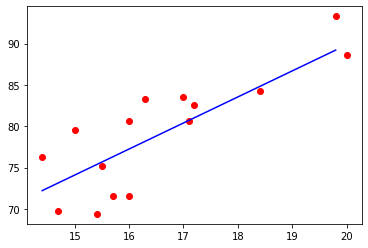

In [ ]:
#(2) Chart the original data and the equation on the chart
plt.scatter(X, y, color='red')
plt.plot(X_test, regressor.predict(X_test) , color='blue')

In [ ]:
#(3) finding r2:

from sklearn import metrics 

print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8468081839100418


In [ ]:
#(4) interpolation:

regressor.predict([[18]])

array([83.54149792])

Interpretation of interpolation:
* When chirping at a rate of 18 chirps per second, the approximate ground temperature that morning was 83.5

(5) Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [ ]:
# y = mx + c
# 95 = 3.14*x + 26.9

x = 95 - 26.9 / 3.14
print(x)

86.43312101910828


Interpretation of (5):
* chirping rate is 86 which is illogical, since the chirping rate range is 14 to 20.

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
df.shape

(62, 2)

In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

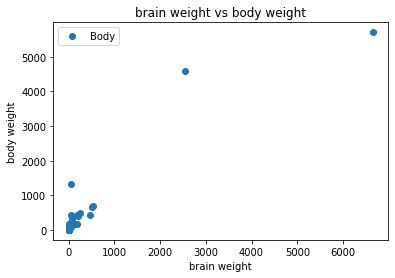

In [ ]:
# EDA

df.plot(x='Brain', y='Body', style='o')

plt.title('brain weight vs body weight')
plt.xlabel('brain weight')
plt.ylabel('body weight')

plt.show()

In [ ]:
# dropping outliers:

df = df[df['Brain']<400]
df.shape

(57, 2)

In [ ]:
# checking the correlation
df.corr()

,Brain,Body
Brain,1.000000,0.552734
Body,0.552734,1.000000


Interpretation:
* there is high corelation between them
* hence, we can use Linear regression model

In [ ]:
# converting into numpy array

X = df.iloc[:, :-1].values # features 
y = df.iloc[:, -1].values # target

In [ ]:
# splitting the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 777)

In [ ]:
# scaling the data

# from sklearn.preprocessing import StandardScaler      
# scaler = StandardScaler()     # initialising

# scaler.fit(X_train)        # FIT : will find the values of mu and sigma only from TRAIN data
# X_train = scaler.transform(X_train)       # convert X_train data into "X_train-(normalised)"  
# X_test = scaler.transform(X_test) 

In [ ]:
# modelling

from sklearn.linear_model import LinearRegression  

regressor = LinearRegression() # initialising linear regression. ie. y=mx+c

regressor.fit(X_train, y_train)  #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [ ]:
print("m: ",regressor.coef_) # m is coefficient
print("c: ",regressor.intercept_) # c is intercept

m:  [1.91489175]
c:  52.39285357965901


(1) Linear Regression Equation for this data: (y = mx+c)

* predicted_body_weight = 961*brain_weight + 343

In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
y_pred

array([119.41406489,  54.11625616,  53.44604404,  52.4120025 ,
        52.40242804,  53.8960436 ,  58.71199636,  52.58625765,
        52.77583193, 531.11579154,  52.62647037,  57.18008296])

In [ ]:
# comparing 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,56.00,119.414065
1,2.60,54.116256
2,2.40,53.446044
3,0.25,52.412002
4,0.14,52.402428
5,3.50,53.896044
6,25.60,58.711996
7,4.00,52.586258
8,5.00,52.775832
9,490.00,531.115792


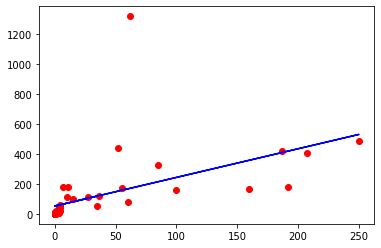

In [ ]:
#(2) Chart the original data and the equation on the chart
plt.scatter(X, y, color='red')
plt.plot(X_test, regressor.predict(X_test) , color='blue')

In [ ]:
#(3) finding r2:

from sklearn import metrics 

print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8633382797766883


* since R2 score is 0.86 (>0.8), the model is a good model

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df.shape

(52, 6)

In [ ]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


interpretation of correlation:
* degree - not linearly corelated
* sex - corelated
* rank,year, YSdeg - highly corelated

In [ ]:
# converting into numpy array

X = df.iloc[:, :-1].values # features 
y = df.iloc[:, -1].values # target

In [ ]:
# splitting the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
# scaling the data
from sklearn.preprocessing import StandardScaler   # standrard scaling 
scaler = StandardScaler()         # initialise to a variable

scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)   # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test)   # transform the test data 

In [ ]:
# modelling the data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# finding the coefficients of the feature:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank', 'Year', 'Degree','YSdeg'],                         
                        columns=['Coefficient'])

coeff_df

,Coefficient
Sex,1015.330169
Rank,5470.117532
Year,2762.036053
Degree,-666.497953
YSdeg,-1863.617300


Interpretation of coefficient:
* rank, year, sex are correlated to the salary

In [ ]:
regressor.intercept_   # c

23724.277777777777

(1) Linear Regression equationis:
* salary_prediction = 1015.sex + 5470.rank + 2762.year + (-666.degree) + (-1863).YSdeg + 23724

In [ ]:
# prediction
y_pred = regressor.predict(X_test_scaled)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,24450,29010.785932
1,18000,16514.904752
2,15350,18604.765643
3,28200,29715.476772
4,17250,18915.839543
5,28516,32454.714170
6,24742,26376.365970
7,15000,18293.691743
8,26775,29288.674196
9,23713,18943.068250


In [ ]:
# r2 value
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7703483930642212


In [ ]:
# selecting best features

from sklearn.feature_selection import RFE

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=2, step=1)    
selector = selector.fit(X_train_scaled, y_train)

list(zip(['Sex', 'Rank', 'Year', 'Degree','YSdeg'],selector.support_))

[('Sex', False),
 ('Rank', True),
 ('Year', True),
 ('Degree', False),
 ('YSdeg', False)]

Interpretation of the findings:
* (2)Find the selection of columns with the best R2 score.
  - Rank , Year are the best features
* (3)Report whether sex is a factor in salary.
  - sex is a 3rd major player in determining the salary


hence, salary discrimination based on gender does not hold true.